<a href="https://colab.research.google.com/github/VaishnaviDayal7/Walmart/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

Objective:

To understand if the spending habits differ between male and female customers

Goal:
1. Basic data exploration
2. Outlier detection and treatment
3. Graphical and non graphical analysis of various metrics
4. Confidence interval using CLT and bootstrapping on gender, marital status and age
5. Recommendations for Walmart

In [ ]:
#first, we import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats

In [ ]:
!gdown 1_K30sDiRCIiXTA7ygG5fIUkBj9tQFRYS

Downloading...
From: https://drive.google.com/uc?id=1_K30sDiRCIiXTA7ygG5fIUkBj9tQFRYS
To: /content/walmart_data.txt
100% 23.0M/23.0M [00:00<00:00, 58.6MB/s]


In [ ]:
walmart_data = pd.read_csv('walmart_data.txt')

walmart_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# **Basic Data Exploration:**

In [ ]:
#we can observe that there are no null values
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
walmart_data.shape

(550068, 10)

In [ ]:
walmart_data['Purchase'].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


# Observations:
1. We can observe there is no null values present in our dataset hence we do not need missing data treatment

2. There are 550068 rows and 10 columns in our data

# **Outlier Detection and Treatment**

Purchase Amount is a numerical and continuous variable, which makes it ideal for detecting outliers. The other variables such as User_ID, Product_ID, Gender, Age (in bins), Occupation, City_Category, StayInCurrentCityYears, Marital_Status, and ProductCategory, are either categorical, identifier variables, or binned categories, which are not as suitable for outlier detection techniques.

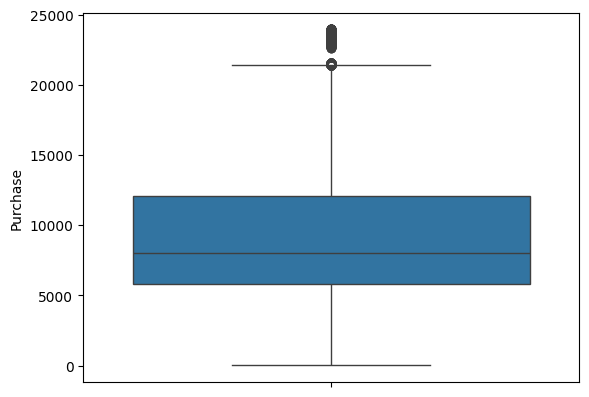

In [ ]:
#1 Age Variable
sns.boxplot(data=walmart_data,y='Purchase')
plt.show()

In [ ]:
#since there are quite a few outliers in the Purchase column, we will clip the data such that outliers are removed
iqr = np.percentile(walmart_data['Purchase'],75) - np.percentile(walmart_data['Purchase'],25)
upper = np.percentile(walmart_data['Purchase'],75) + (1.5 * iqr)
lower = np.percentile(walmart_data['Purchase'],25) - (1.5 * iqr)

In [ ]:
walmart_data['Purchase'] = np.clip(walmart_data['Purchase'],lower,upper)
walmart_data.sort_values(by='Age',ascending=False).head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
364776,1002092,P00015642,M,55+,1,B,4+,1,8,5998.0
295862,1003618,P00154042,M,55+,17,A,4+,1,1,11390.0
295864,1003618,P00004242,M,55+,17,A,4+,1,1,12086.0
295865,1003618,P00320342,M,55+,17,A,4+,1,1,8238.0
295866,1003618,P00138542,M,55+,17,A,4+,1,5,5278.0


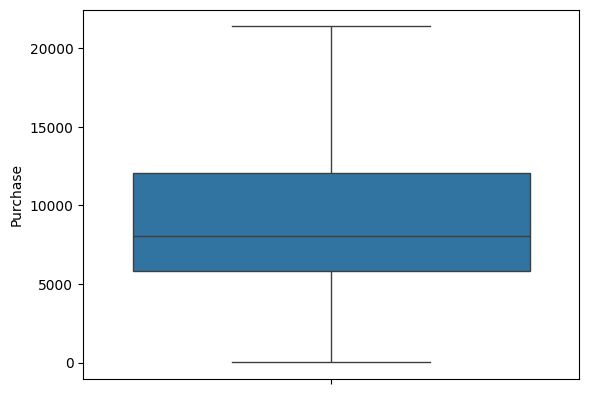

In [ ]:
#After removing the outliers, our purchase column does not contain any outliers
sns.boxplot(data=walmart_data,y='Purchase')
plt.show()

# Visual and Non Visual Analysis

In [ ]:
cucity_counts = walmart_data.groupby(['Stay_In_Current_City_Years'])['User_ID'].nunique().reset_index()
cucity_counts

,Stay_In_Current_City_Years,User_ID
0,0,772
1,1,2086
2,2,1145
3,3,979
4,4+,909


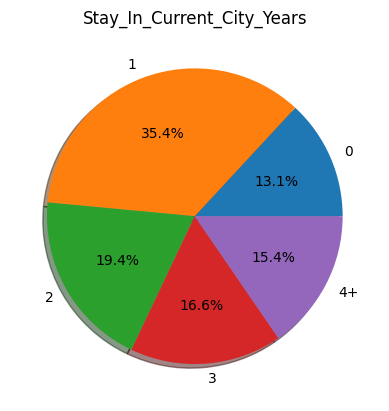

In [ ]:
plt.pie(cucity_counts['User_ID'],autopct='%1.1f%%',labels=cucity_counts['Stay_In_Current_City_Years'],shadow=True)
plt.title('Stay_In_Current_City_Years')
plt.show()

# **Observations:**
1 Year (35.2%): The largest segment, indicating that the majority of people have stayed in their current city for 1 year.

2 Years (18.5%): The second-largest segment, showing a significant number of individuals staying for this duration.

3 Years (17.3%): Similar to the 2-year stay group, but slightly smaller in proportion.

4+ Years (15.4%): A noteworthy portion of individuals have long-term stays in their current city.

0 Years (13.5%): The smallest segment, representing those who are new to the city.

# **Insights:**

High Mobility: The high percentage of individuals staying for 1 year suggests a high level of mobility or recent relocations.

Short-Term Stay: More than half of the individuals (53.7%) have stayed for 2 years or less, indicating a trend towards shorter stays in the current city.

Long-Term Residents: A smaller proportion (32.7%) of the population consists of long-term residents who have stayed for 3 years or more.

Yearly Turnover: The significant presence of 0-year stays indicates a steady influx of new residents, contributing to the city's dynamic demographic.

In [ ]:
cityc_counts = walmart_data.groupby(['City_Category'])['User_ID'].nunique().reset_index()
cityc_counts

,City_Category,User_ID
0,A,1045
1,B,1707
2,C,3139


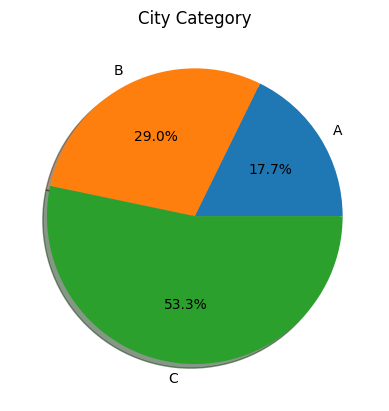

In [ ]:
plt.pie(cityc_counts['User_ID'],autopct='%1.1f%%',labels=cityc_counts['City_Category'],shadow=True)
plt.title('City Category')
plt.show()

# **Observations:**

Category A (17.7%): This is the smallest segment in the chart, indicating that a smaller proportion of the data belongs to City Category A.

Category B (29.0%): This category has a moderate share of the data, making up almost a third of the total.

Category C (53.3%): This is the largest segment, comprising more than half of the data.

# **Insights:**

Dominance of Category C: The significant proportion of Category C suggests it is the most prevalent or significant category within the dataset. This could imply a larger population, more resources, or higher activity in this category.

Balanced Distribution Between A and B: While Categories A and B have fewer representations than C, they still hold a substantial portion of the data. This balanced distribution between the two smaller segments indicates a diversified spread across different city categories.

In [ ]:
occ = walmart_data.groupby(['Occupation'])['User_ID'].nunique().reset_index()
occ

,Occupation,User_ID
0,0,688
1,1,517
2,2,256
3,3,170
4,4,740
5,5,111
6,6,228
7,7,669
8,8,17
9,9,88


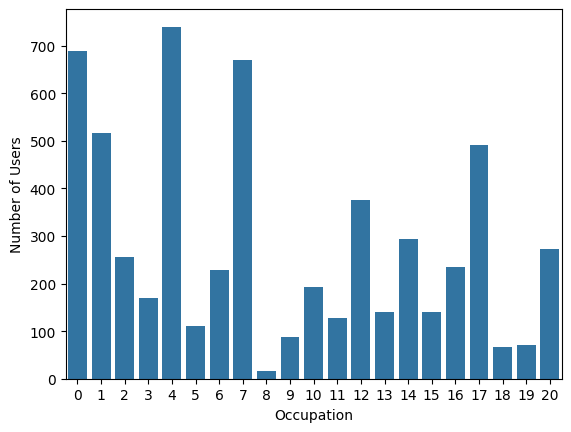

In [ ]:
sns.barplot(data=occ,x='Occupation',y='User_ID')
plt.ylabel('Number of Users')
plt.show()

# **Observations:**

Occupation 4: This occupation has the highest count, with approximately 70,000 individuals.

Occupation 0: This occupation also has a high count, slightly below 70,000.

Occupation 7: This occupation has a significant count, around 60,000.

Occupations 1, 3, and 18: These occupations have moderate counts, ranging between 30,000 and 50,000.

Lower Count Occupations: Occupations 2, 5, 6, 8, 10, 11, 13, 14, 15, 16, and 20 have lower counts, generally below 30,000.

Occupation 9: This occupation has the lowest count, with fewer than 5,000 individuals.

# **Insights:**

High Concentration in Few Occupations: A few occupations (specifically 4, 0, and 7) have a much higher count of individuals compared to others. This indicates that these occupations are significantly more common.

Diverse Distribution: The noticeable variation in the distribution of individuals across different occupations suggests a diverse workforce. However, it also indicates that some occupations are much less common.

Potential Focus Areas: Occupations with the highest counts (0, 4, 7) could be key focus areas for workforce development, training programs, and policy-making.

Occupations with Minimal Representation: Occupations with the lowest counts (like 9) might require further investigation to understand the reasons behind their lower representation, which could be due to a variety of factors such as market demand, skill requirements, or job availability.

In [ ]:
ag_counts = walmart_data['Age'].value_counts().reset_index().sort_values(by='Age')
ag_counts

,Age,count
6,0-17,15102
2,18-25,99660
0,26-35,219587
1,36-45,110013
3,46-50,45701
4,51-55,38501
5,55+,21504


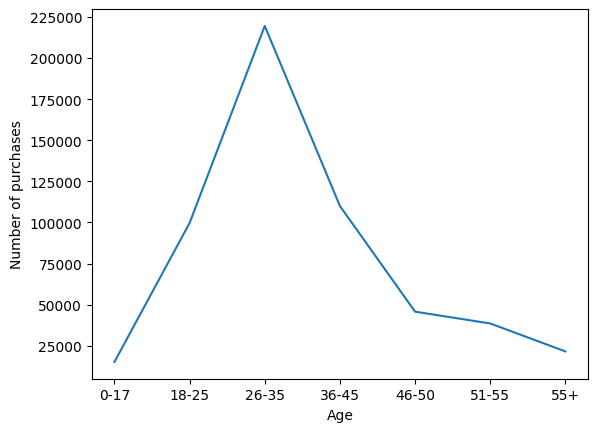

In [ ]:
sns.lineplot(data=ag_counts,x='Age',y='count')
plt.ylabel('Number of purchases')
plt.show()

# **Observations:**

Peak in Purchases (26-35): The 26-35 age group has the highest number of purchases, with approximately 225,000.

Rising Trend (18-25 to 26-35): There is a noticeable increase in the number of purchases as we move from the 18-25 age group to the 26-35 age group.

Decline After Peak (36-45 and Beyond): After the 26-35 age group, there is a steady decline in the number of purchases across subsequent age groups.

Significant Drop (36-45): The 36-45 age group sees a significant decrease, with purchases around 125,000, much lower than the 26-35 age group.

Continuous Decline (46-50, 51-55): The number of purchases continues to decline in the 46-50 and 51-55 age groups.

Lowest Purchases (55+): The 55+ age group has the fewest purchases, with fewer than 25,000.

# **Insights:**

Target Age Group for Marketing: The 26-35 age group is the most active in making purchases. Marketing strategies should focus on this age group to maximize sales.

Engagement Opportunities: There is a potential to increase engagement with the 36-45 age group, which shows a sharp decline in purchases. Understanding the reasons behind this drop could help in tailoring marketing efforts to this segment.

Retirement Impact: The steady decline in purchases after 35 and the lowest purchases in the 55+ group might indicate reduced buying activity as people approach retirement age.

Trend Analysis: The rising trend from 18-25 to 26-35 suggests that as individuals enter their late twenties and early thirties, their purchasing power or willingness to spend increases.

In [ ]:
gender_counts = walmart_data.groupby(['Gender'])['User_ID'].nunique()
gender_counts

,User_ID
Gender,
F,1666
M,4225


# **Observations:**
There are more purchases made by male than females

In [ ]:
p_id_top_10 = walmart_data['Product_ID'].value_counts().sort_values(ascending=False).reset_index().head(10)
p_id_top_10

,Product_ID,count
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
5,P00184942,1440
6,P00046742,1438
7,P00058042,1422
8,P00059442,1406
9,P00145042,1406


In [ ]:
#unique products bought in age groups
products_bought_in_age = walmart_data.groupby('Age')['Product_ID'].nunique().reset_index()
products_bought_in_age

,Age,Product_ID
0,0-17,2323
1,18-25,3220
2,26-35,3427
3,36-45,3328
4,46-50,3106
5,51-55,2887
6,55+,2584


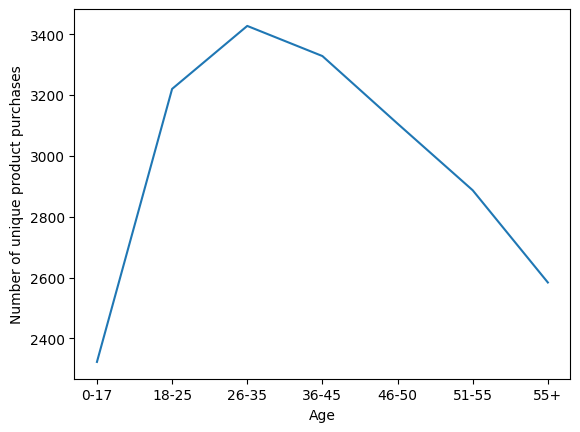

In [ ]:
sns.lineplot(data=products_bought_in_age, x='Age', y='Product_ID')
plt.ylabel('Number of unique product purchases')
plt.show()

# **Observations:**

Sharp Increase from 0-17 to 26-35: The number of unique product purchases rises significantly from the 0-17 age group to the 26-35 age group.

Peak at 26-35: The highest number of unique product purchases occurs in the 26-35 age group, with around 3400 purchases.

Gradual Decrease Post-Peak: After peaking at the 26-35 age group, there's a steady decline in the number of unique product purchases as the age groups increase.

Lowest Purchases in 0-17: The 0-17 age group has the lowest number of unique product purchases, indicating less purchasing activity in this demographic.

Continued Decline in Older Age Groups: The number of unique product purchases decreases gradually across older age groups (36-45, 46-50, 51-55, 55+).

# **Insights:**

High Purchasing Activity in Young Adults: The 26-35 age group is the most active in making unique product purchases. This age group should be a key focus for marketing and product development strategies.

Potential for Growth in Younger Demographics: The lower number of purchases in the 0-17 age group indicates a potential market that could be targeted with age-appropriate products and marketing campaigns.

Declining Interest with Age: The gradual decline in unique product purchases among older age groups suggests a shift in purchasing behavior. This could be due to changing priorities, income levels, or product needs as people age.

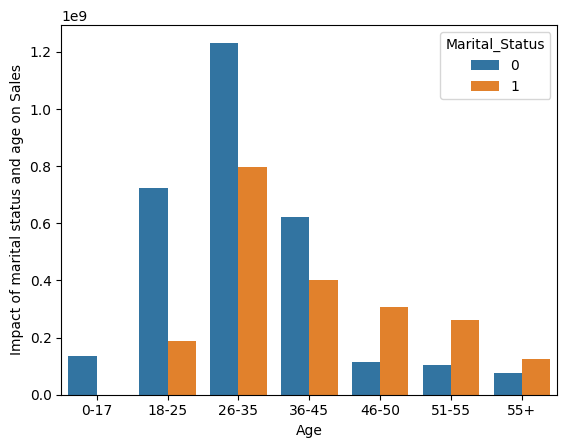

In [ ]:
#purchases made by age groups are married or not
r = walmart_data.groupby(['Age','Marital_Status'])['Purchase'].sum().reset_index()

r.columns.name = None

sns.barplot(data=r,x='Age',y='Purchase',hue='Marital_Status')
plt.ylabel('Impact of marital status and age on Sales')
plt.show()

# **Observations:**

26-35 Age Group Dominates: The highest number of purchases is made by the 26-35 age group, with marital status 0 showing a significantly higher count compared to marital status 1.

Gradual Decline with Age: There's a noticeable decline in the number of purchases as age increases beyond 35, for both marital statuses.

Marital Status 1 Surpasses After 45: For the age groups 46-50, 51-55, and 55+, the number of purchases for marital status 1 is higher compared to marital status 0.

Least Purchases in 0-17 Age Group: The age group 0-17 has the lowest number of purchases, with a slight lead for marital status 0 over 1.

# **Insights:**

Key Target Demographic: The 26-35 age group is the most active purchasing group, making them a crucial demographic for targeted marketing strategies.

Impact of Marital Status on Younger Adults: Younger adults with marital status 0 (possibly single or unmarried) are leading in purchases, indicating they might have more disposable income or different spending habits compared to their married counterparts.

Shift in Spending Post-45: Post the age of 45, individuals with marital status 1 (possibly married) show higher purchasing activity. This could be due to different life stages, family needs, or increased financial stability.

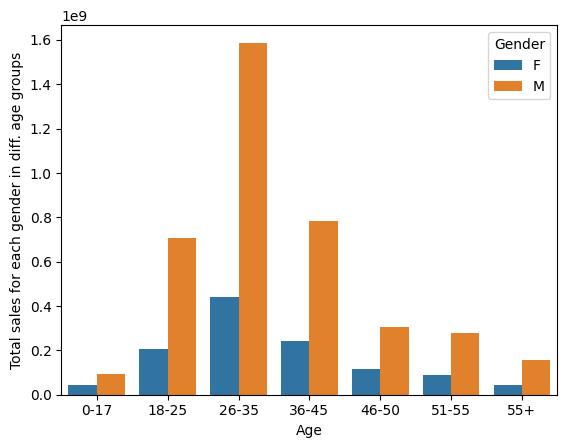

In [ ]:
#purchases made by age groups are male or female
m = walmart_data.groupby(['Age','Gender'])['Purchase'].sum().reset_index()

m.columns.name = None

sns.barplot(data=m,x='Age',y='Purchase',hue='Gender')
plt.ylabel('Total sales for each gender in diff. age groups')
plt.show()

# **Observations:**

26-35 Age Group Dominates: This age group has the highest number of purchases for both genders, with males significantly outpacing females.

Males Lead in All Groups: In every age group, males have a higher number of purchases compared to females.

Second Highest for Males (36-45): The second highest number of purchases for males is in the 36-45 age group, followed by the 18-25 age group.

Second Highest for Females (18-25): For females, the second highest number of purchases is in the 18-25 age group, followed by the 36-45 age group.

Lowest Purchases (0-17 and 55+): The age groups 0-17 and 55+ have the lowest number of purchases for both genders.

Noticeable Drop Post 36-45: There is a significant drop in the number of purchases for both genders after the age group 36-45.

# **Insights:**

Key Target Demographic: The 26-35 age group, especially males, is the most active in making purchases. Targeting marketing strategies towards this group could yield high returns.

Gender Differences: The consistent lead of males in purchasing across all age groups suggests different spending behaviors between genders. This insight can inform gender-specific marketing strategies.

Youth Market: The lower purchases in the 0-17 age group highlight a potential market for products targeted at younger demographics, possibly through parents or guardians.

In [ ]:
#famous product category among men
male = walmart_data.loc[(walmart_data['Gender']=='M')].copy()
famous_pc_in_male = male.groupby('Product_Category')['Purchase'].sum().reset_index()
famous_pc_in_male

,Product_Category,Purchase
0,1,1.572383e+09
1,2,2.039726e+08
2,3,1.424472e+08
3,4,1.844728e+07
4,5,6.771772e+08
5,6,2.530462e+08
6,7,4.543638e+07
7,8,6.026363e+08
8,9,5.168784e+06
9,10,7.428964e+07


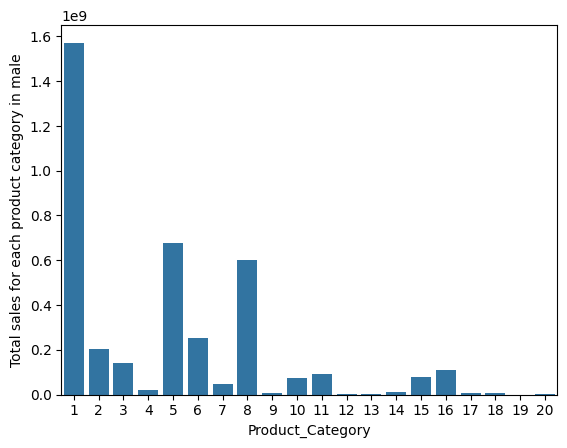

In [ ]:
sns.barplot(data=famous_pc_in_male,x='Product_Category',y='Purchase')
plt.ylabel('Total sales for each product category in male')
plt.show()

# **Observations:**

Dominant Category (1): Product category 1 has the highest number of purchases, significantly surpassing all other categories, with approximately 1.6 billion purchases.

Secondary Peaks (5 and 8): Product categories 5 and 8 also have relatively high purchase numbers, with each category having around 0.7 billion purchases.

Low Purchase Categories: Several product categories (9, 10, 11, 12, 13, 14, 17, 18, 19, 20) have very minimal purchases.

Moderate Purchase Categories: Categories 2, 3, 4, 6, 7, 15, and 16 have moderate purchase numbers, but they are still much lower compared to categories 1, 5, and 8.

Skewed Distribution: The distribution of purchases is highly skewed, with a few categories dominating the total number of purchases.

# **Insights:**

Market Leaders: The dominance of product category 1 indicates that it is a market leader, possibly due to high demand or successful marketing strategies.

Potential Growth Areas: The relatively high numbers for categories 5 and 8 suggest potential growth areas that could be further explored and leveraged.

Niche Markets: The low purchase numbers in categories 9, 10, 11, 12, 13, 14, 17, 18, 19, and 20 indicate niche markets. These could represent opportunities for targeted marketing or specialized products.

In [ ]:
#famous product category among females
female = walmart_data.loc[(walmart_data['Gender']=='F')].copy()
famous_pc_in_female = female.groupby('Product_Category')['Purchase'].sum().reset_index()
famous_pc_in_female

,Product_Category,Purchase
0,1,337631145.0
1,2,64543617.0
2,3,61637516.0
3,4,8933206.0
4,5,264658078.0
5,6,71104116.0
6,7,15460347.0
7,8,251682476.0
8,9,1076783.0
9,10,21781693.0


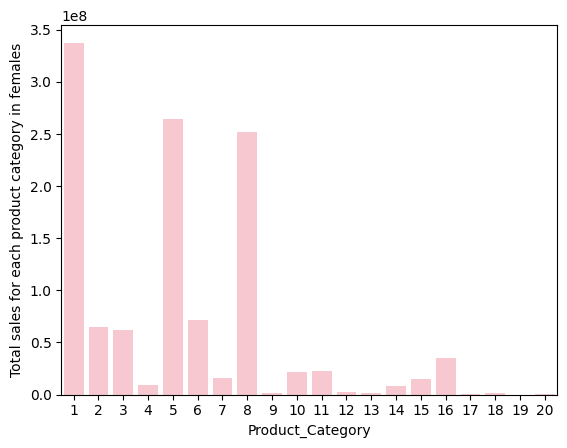

In [ ]:
sns.barplot(data=famous_pc_in_female,x='Product_Category',y='Purchase',color='pink')
plt.ylabel('Total sales for each product category in females')
plt.show()

# **Observations:**

Product Category 1 Dominates: This category has the highest number of purchases, with over 350 million purchases.

Significant Purchases in Categories 5 and 8: Both categories have a notable number of purchases, each exceeding 250 million.

Moderate Purchase Numbers: Categories 2, 3, 4, and 7 have moderate purchase numbers, ranging between 50 million and 100 million.

Low Purchase Categories: Categories 6, 9-20 have relatively low purchase numbers, most with fewer than 50 million purchases.

Drop Post Category 8: There is a noticeable decline in the number of purchases after category 8, with only a few categories (like 15) showing slight increases.

# **Insights:**

Popularity of Specific Categories: Categories 1, 5, and 8 are clear favorites among female purchasers, suggesting high demand or successful marketing for these products.

Potential Growth Areas: Moderate purchase categories (2, 3, 4, 7) could be targeted for growth with better marketing strategies or product enhancements.

Niche Markets: The low purchase numbers in many categories indicate niche markets that might benefit from more focused marketing or product development.

Trend Analysis: The sharp drop in purchases after category 8 indicates a significant skew in product popularity, where a few categories dominate the majority of purchases.

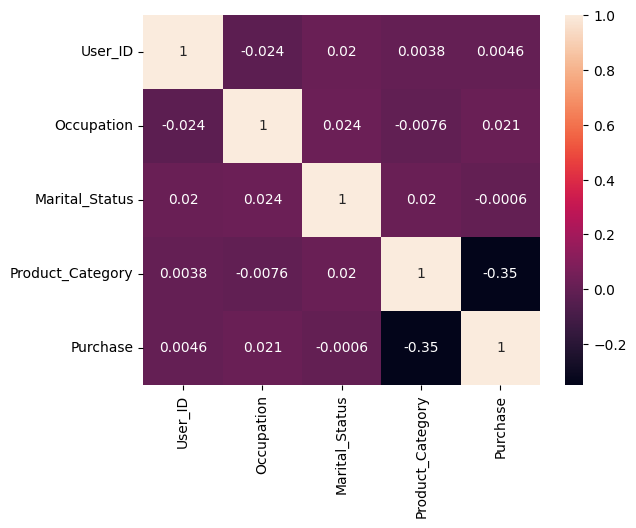

In [ ]:
# correlation between different columns
sns.heatmap(data=walmart_data.corr(numeric_only=True),annot=True)
plt.show()

# **Insights:**

Occupation's Minimal Influence: The low correlations of Occupation with Purchase and Marital_Status suggest that Occupation is not a strong predictor of purchasing behavior or marital status in this dataset.

Marital_Status's Limited Role: Marital_Status appears to have negligible influence on Purchase behavior, indicating that marital status does not significantly impact spending patterns within this dataset.

Product_Category's Impact on Purchase: The moderate negative correlation between Product_Category and Purchase implies that as the product category number increases, the purchase amount tends to decrease. This could be due to certain product categories having lower-priced items or less frequent high-value purchases.

Purchase's Primary Influence: Purchase is mainly influenced by Product_Category, with other variables having negligible impact. This suggests that understanding the nature of different product categories is key to predicting purchase amounts.



---



# **Inferential analysis: Gender Testing**

In [ ]:
#Confidence interval using CLT on whole sample

sample_mean_m = np.mean(male['Purchase'])
sample_std_m = np.std(male['Purchase'])
confidence_level = 0.95
confidence_interval_m = norm.interval(confidence_level, loc=sample_mean_m, scale=sample_std_m/np.sqrt(len(male['Purchase'])))   #since the data size is large is enough, it is safe to assume the sample std is approximatly similar to the population std according to law of large numbers


confidence_interval_m #C.I of the sample

(9412.938299970543, 9443.808609571553)

In [ ]:
#Bootstrapping for male sample data
#Size 300
import random as random
random.seed(123)

sample_means_m_300 = []

for i in range(100000):
  bootstrapped_samp_m = np.random.choice(male['Purchase'],size=300)
  bootstrapped_samp_m_mean = np.mean(bootstrapped_samp_m)
  sample_means_m_300.append(bootstrapped_samp_m_mean)


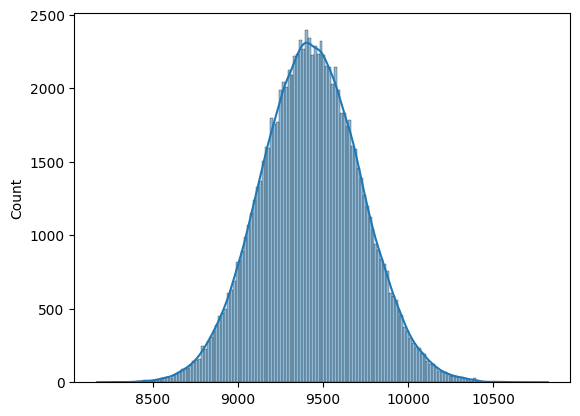

In [ ]:
sns.histplot(sample_means_m_300,kde=True)
plt.show()

In [ ]:
confidence_level = 0.95

confidence_interval_m_300 = norm.interval(confidence_level, loc=np.mean(sample_means_m_300), scale=sample_std_m/np.sqrt(300))
confidence_interval_m_300

(8856.356297149588, 10003.496060417077)

In [ ]:
#Bootstrapping for male sample data
#Size 3000
import random as random
random.seed(123)

sample_means_m_3000 = []

for i in range(100000):
  bootstrapped_samp_m = np.random.choice(male['Purchase'],size=3000)
  bootstrapped_samp_m_mean = np.mean(bootstrapped_samp_m)
  sample_means_m_3000.append(bootstrapped_samp_m_mean)


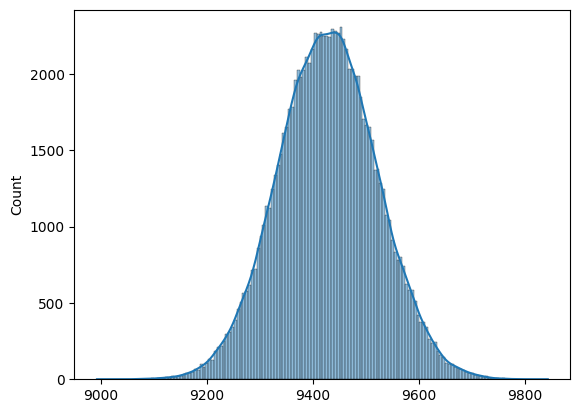

In [ ]:
sns.histplot(sample_means_m_3000,kde=True)
plt.show()

In [ ]:
confidence_level = 0.95

confidence_interval_m_3000 = norm.interval(confidence_level, loc=np.mean(sample_means_m_3000), scale=sample_std_m/np.sqrt(3000))
confidence_interval_m_3000

(9246.849565561419, 9609.607010208581)

In [ ]:
#Bootstrapping for male sample data
#Size 30000
import random as random
random.seed(123)

sample_means_m_30000 = []

for i in range(100000):
  bootstrapped_samp_m = np.random.choice(male['Purchase'],size=30000)
  bootstrapped_samp_m_mean = np.mean(bootstrapped_samp_m)
  sample_means_m_30000.append(bootstrapped_samp_m_mean)


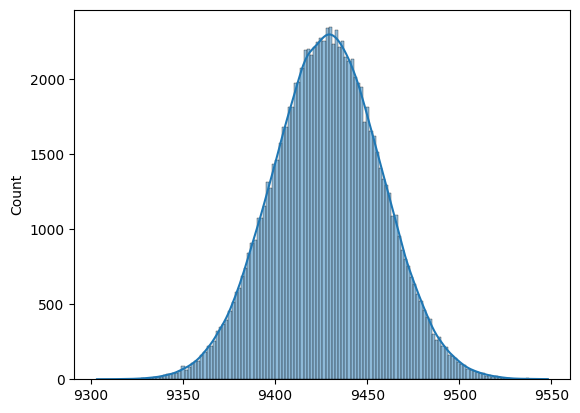

In [ ]:
sns.histplot(sample_means_m_30000,kde=True)
plt.show()

In [ ]:
confidence_level = 0.95

confidence_interval_m_30000 = norm.interval(confidence_level, loc=np.mean(sample_means_m_3000), scale=sample_std_m/np.sqrt(30000))
confidence_interval_m_30000

(9370.871299721626, 9485.585276048374)

Observations:

1. Confidence interval for our whole sample of male transactions is (9413,9444) which means 95% of men spend between average Rs.9413 and Rs.9444 on a black friday sale.
2. Using boostrapping method with different sample sizes, we found that as the bootstrapped sample size is greater, the confidence interval is narrower and closer to the whole data's confidence interval.

- n = 300, Confidence interval = (8856, 10003)
- n = 3000, Confidence interval = (9247, 9610)
- n = 30000, Confidence interval = (9371, 9486)


This is because The width of a confidence interval (CI) is inversely related to the square root of the sample size. As the sample size increases, the standard error decreases, which in turn narrows the width of the confidence interval.

3. There is very less overlaps between the confidence interval, this illustrates how increasing sample size narrows the confidence interval, making overlap with smaller sample sizes less likely.

4. As sample size increases, the sampling distribution of the mean becomes approximately normal, with less spread (i.e., a smaller standard error).

In [ ]:
#Analysis on female gender

In [ ]:
#Confidence interval using CLT on whole sample

sample_mean_f = np.mean(female['Purchase'])
sample_std_f = np.std(female['Purchase'])
confidence_level = 0.95
confidence_interval_f = norm.interval(confidence_level, loc=sample_mean_f, scale=sample_std_f/np.sqrt(len(female['Purchase'])))   #since the data size is large is enough, it is safe to assume the sample std is approximatly similar to the population std according to law of large numbers


confidence_interval_f #C.I of the sample

(8701.029794056074, 8751.482859744483)

In [ ]:

#Size 300
import random as random
random.seed(123)

sample_means_f_300 = []

for i in range(100000):
  bootstrapped_samp_f = np.random.choice(female['Purchase'],size=300)
  bootstrapped_samp_f_mean = np.mean(bootstrapped_samp_f)
  sample_means_f_300.append(bootstrapped_samp_f_mean)


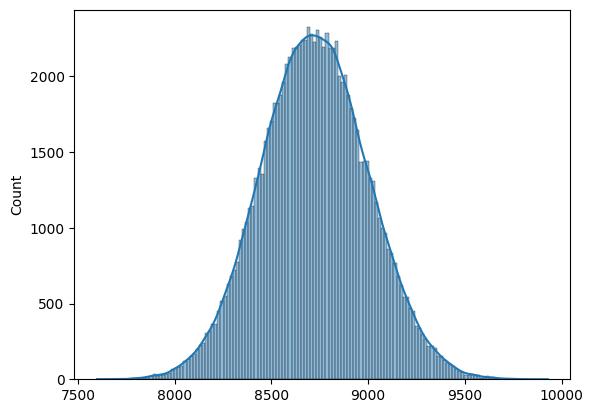

In [ ]:
sns.histplot(sample_means_f_300,kde=True)
plt.show()

In [ ]:
confidence_level = 0.95

confidence_interval_f_300 = norm.interval(confidence_level, loc=np.mean(sample_means_f_300), scale=sample_std_f/np.sqrt(300))
confidence_interval_f_300

(8187.772147262194, 9261.245353137803)

In [ ]:
#Size 3000
import random as random
random.seed(123)

sample_means_f_3000 = []

for i in range(100000):
  bootstrapped_samp_f = np.random.choice(female['Purchase'],size=3000)
  bootstrapped_samp_f_mean = np.mean(bootstrapped_samp_f)
  sample_means_f_3000.append(bootstrapped_samp_f_mean)


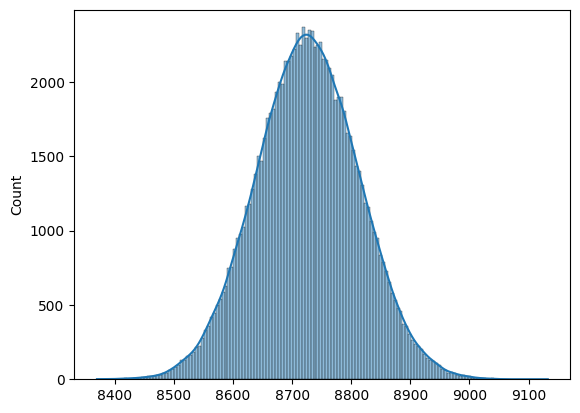

In [ ]:
sns.histplot(sample_means_f_3000,kde=True)
plt.show()

In [ ]:
confidence_level = 0.95

confidence_interval_f_3000 = norm.interval(confidence_level, loc=np.mean(sample_means_f_3000), scale=sample_std_f/np.sqrt(3000))
confidence_interval_f_3000

(8556.467470293514, 8895.92950406649)

In [ ]:
#Size 30000
import random as random
random.seed(123)

sample_means_f_30000 = []

for i in range(100000):
  bootstrapped_samp_f = np.random.choice(female['Purchase'],size=30000)
  bootstrapped_samp_f_mean = np.mean(bootstrapped_samp_f)
  sample_means_f_30000.append(bootstrapped_samp_f_mean)

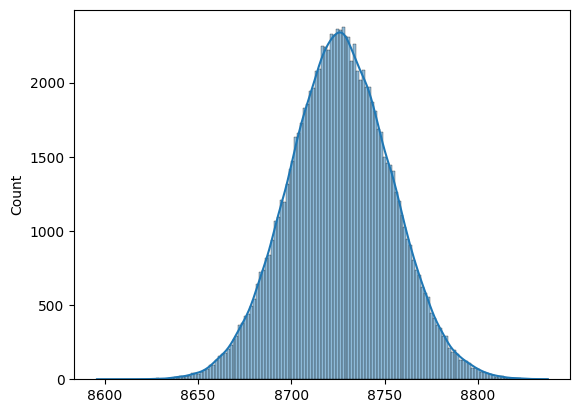

In [ ]:
sns.histplot(sample_means_f_30000,kde=True)
plt.show()

In [ ]:
confidence_level = 0.95

confidence_interval_f_30000 = norm.interval(confidence_level, loc=np.mean(sample_means_f_3000), scale=sample_std_f/np.sqrt(30000))
confidence_interval_f_30000

(8672.524826886221, 8779.872147473781)

# **Observations:**

1. Confidence interval for our whole sample of female transactions is (8701, 8752) which means 95% of females spend between average Rs.8701 and Rs.8752 on a black friday sale.
2. Using boostrapping method with different sample sizes, we found that as the bootstrapped sample size is greater, the confidence interval is narrower and closer to the whole data's confidence interval.

- n = 300, Confidence interval = (8189,9263)
- n = 3000, Confidence interval = (8557, 8897)
- n = 30000, Confidence interval = (8673,8780)


This is because The width of a confidence interval (CI) is inversely related to the square root of the sample size. As the sample size increases, the standard error decreases, which in turn narrows the width of the confidence interval.

3. There is very less overlaps between the confidence interval, this illustrates how increasing sample size narrows the confidence interval, making overlap with smaller sample sizes less likely.

4. As sample size increases, the sampling distribution of the mean becomes approximately normal, with less spread (i.e., a smaller standard error).

In [ ]:
#Are women spending more money per transaction than men?
#To answer this question, we will perform hypothesis testing
#Ho = There is no difference in their spending habits
#Ha = Men are spending more than women

In [ ]:
from scipy.stats import ttest_ind

stat, pval = ttest_ind(male['Purchase'],female['Purchase'],alternative='greater')
stat, pval

(44.99570158102461, 0.0)

In [ ]:
if pval<0.05:
  print('We reject null hypothesis')

else:
  print('We fail to reject null hypothesis')

We reject null hypothesis


In [ ]:
#We can conclude that men spend more during black friday sale than women

Recommendations:

1. Tailor Promotions and Discounts by Gender: The findings show distinct average spending ranges for male and female shoppers, with males generally spending more on average during Black Friday. Walmart could develop targeted promotions to appeal specifically to male customers, who are likely willing to spend slightly more. This could mean offering premium or high-ticket items for male-targeted marketing, while perhaps tailoring promotions for female shoppers to focus on moderately priced items that align with the observed spending range.


2. Optimize Inventory Planning: Since larger sample sizes produced confidence intervals that were narrower and more consistent with the overall spending data, Walmart can use these findings to plan inventory more accurately for Black Friday. By stocking up on products within these spending ranges (Rs.8701 - Rs.8752 for females and Rs.9413 - Rs.9444 for males), Walmart can better align its inventory with customer spending behavior, reducing overstock or stockouts.


3. Emphasize High-Spend Categories for Male Shoppers: Since male shoppers appear to have a higher average spending confidence interval, Walmart might promote higher-end products or bundle deals more effectively to male customers. This could be done through targeted digital ads or in-store displays, especially in departments where higher-ticket items are commonly sold.

# **Marital Status Testing**

In [ ]:
unmarried = walmart_data.loc[(walmart_data['Marital_Status']==0)].copy()
married = walmart_data.loc[(walmart_data['Marital_Status']==1)].copy()

In [ ]:
#Confidence interval using CLT on whole sample for married people

sample_mean_ma = np.mean(married['Purchase'])
sample_std_ma = np.std(married['Purchase'])
confidence_level = 0.95
confidence_interval_ma = norm.interval(confidence_level, loc=sample_mean_ma, scale=sample_std_ma/np.sqrt(len(married['Purchase'])))   #since the data size is large is enough, it is safe to assume the sample std is approximatly similar to the population std according to law of large numbers


confidence_interval_ma #C.I of the sample

(9230.822714220967, 9272.03868892188)

In [ ]:
 #Bootstrapping for male sample data
#Size 300
import random as random
random.seed(123)

sample_means_ma_300 = []

for i in range(100000):
  bootstrapped_samp_f = np.random.choice(married['Purchase'],size=300)
  bootstrapped_samp_f_mean = np.mean(bootstrapped_samp_f)
  sample_means_ma_300.append(bootstrapped_samp_f_mean)

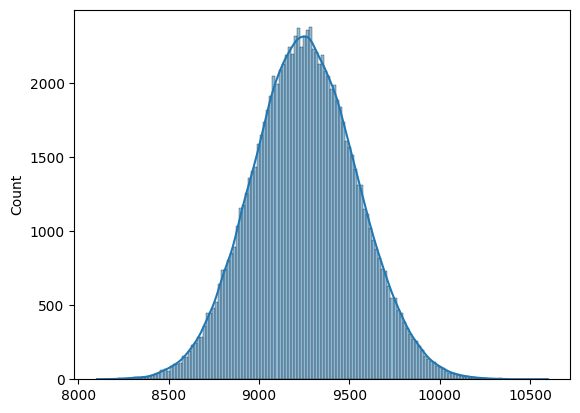

In [ ]:
sns.histplot(sample_means_ma_300,kde=True)
plt.show()

In [ ]:
confidence_level = 0.95

confidence_interval_ma_300 = norm.interval(confidence_level, loc=np.mean(sample_means_ma_300), scale=sample_std_ma/np.sqrt(300))
confidence_interval_ma_300

(8688.966444841992, 9818.557387524676)

In [ ]:
#Size 3000
import random as random
random.seed(123)

sample_means_ma_3000 = []

for i in range(100000):
  bootstrapped_samp_f = np.random.choice(married['Purchase'],size=3000)
  bootstrapped_samp_f_mean = np.mean(bootstrapped_samp_f)
  sample_means_ma_3000.append(bootstrapped_samp_f_mean)

confidence_level = 0.95

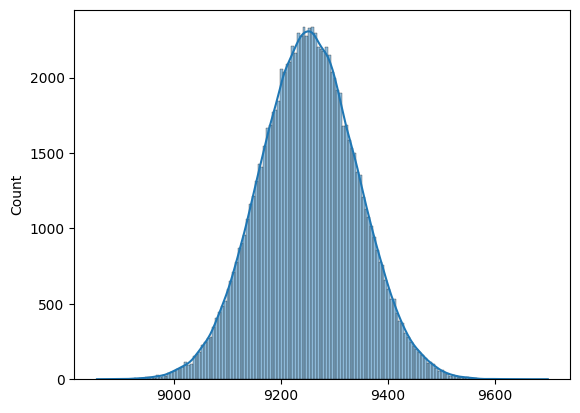

In [ ]:
sns.histplot(sample_means_ma_3000,kde=True)
plt.show()

In [ ]:
confidence_interval_ma_3000 = norm.interval(confidence_level, loc=np.mean(sample_means_ma_3000), scale=sample_std_ma/np.sqrt(3000))
confidence_interval_ma_3000

(9073.113921002965, 9430.321941320366)

In [ ]:
#Size 30000
import random as random
random.seed(123)

sample_means_ma_30000 = []

for i in range(100000):
  bootstrapped_samp_f = np.random.choice(married['Purchase'],size=30000)
  bootstrapped_samp_f_mean = np.mean(bootstrapped_samp_f)
  sample_means_ma_30000.append(bootstrapped_samp_f_mean)

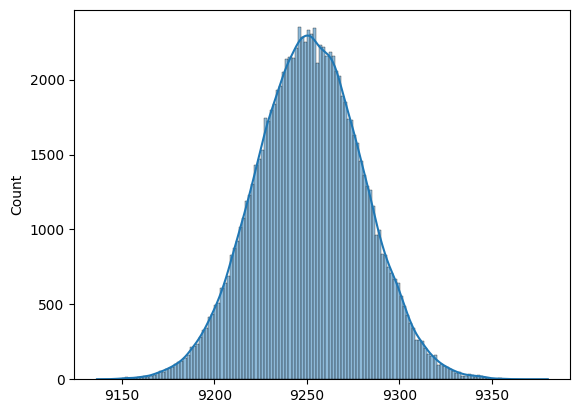

In [ ]:
sns.histplot(sample_means_ma_30000,kde=True)
plt.show()

In [ ]:
confidence_level = 0.95

confidence_interval_ma_30000 = norm.interval(confidence_level, loc=np.mean(sample_means_ma_3000), scale=sample_std_ma/np.sqrt(30000))
confidence_interval_ma_30000

(9195.23838402753, 9308.1974782958)

Observations and Insights:

1. Confidence interval for our whole sample of married transactions is (9231, 9272) which means 95% of married people spend between average Rs.9231 and Rs.9272 on a black friday sale.
2. Using boostrapping method with different sample sizes, we found that as the bootstrapped sample size is greater, the confidence interval is narrower and closer to the whole data's confidence interval.

- n = 300, Confidence interval = (8685, 9814)
- n = 3000, Confidence interval = (9073, 9430)
- n = 30000, Confidence interval = (9195, 9308)

This is because The width of a confidence interval (CI) is inversely related to the square root of the sample size. As the sample size increases, the standard error decreases, which in turn narrows the width of the confidence interval.

3. There is very less overlaps between the confidence interval, this illustrates how increasing sample size narrows the confidence interval, making overlap with smaller sample sizes less likely.

4. As sample size increases, the sampling distribution of the mean becomes approximately normal, with less spread (i.e., a smaller standard error).

In [ ]:
#Confidence interval using CLT on whole sample for unmarried people

sample_mean_u = np.mean(unmarried['Purchase'])
sample_std_u = np.std(unmarried['Purchase'])
confidence_level = 0.95
confidence_interval_u = norm.interval(confidence_level, loc=sample_mean_u, scale=sample_std_u/np.sqrt(len(unmarried['Purchase'])))   #since the data size is large is enough, it is safe to assume the sample std is approximatly similar to the population std according to law of large numbers

confidence_interval_u #C.I of the sample

(9240.302661028647, 9274.73325793197)

In [ ]:
#Bootstrapping for male sample data
#Size 300
import random as random
random.seed(123)

sample_means_u_300 = []

for i in range(100000):
  bootstrapped_samp_f = np.random.choice(unmarried['Purchase'],size=300)
  bootstrapped_samp_f_mean = np.mean(bootstrapped_samp_f)
  sample_means_u_300.append(bootstrapped_samp_f_mean)

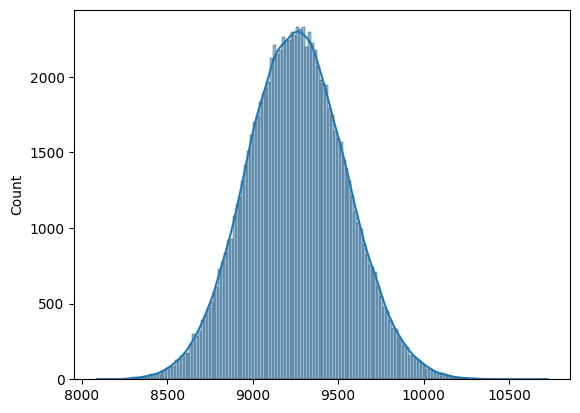

In [ ]:
sns.histplot(sample_means_u_300,kde=True)
plt.show()

In [ ]:
confidence_level = 0.95

confidence_interval_u_300 = norm.interval(confidence_level, loc=np.mean(sample_means_u_300), scale=sample_std_u/np.sqrt(300))
confidence_interval_u_300

(8691.504893181984, 9824.285484851353)

In [ ]:
#Bootstrapping for male sample data
#Size 3000
import random as random
random.seed(123)

sample_means_u_3000 = []

for i in range(100000):
  bootstrapped_samp_f = np.random.choice(unmarried['Purchase'],size=3000)
  bootstrapped_samp_f_mean = np.mean(bootstrapped_samp_f)
  sample_means_u_3000.append(bootstrapped_samp_f_mean)

confidence_level = 0.95

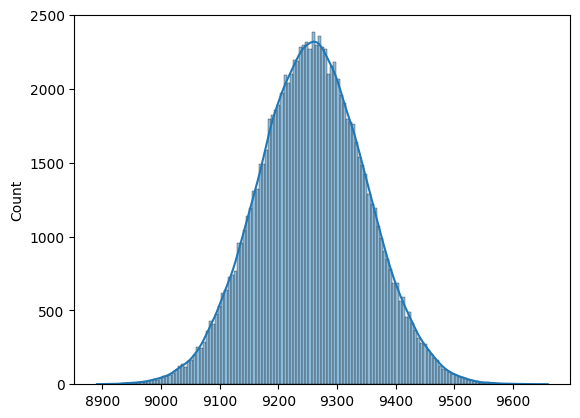

In [ ]:
sns.histplot(sample_means_u_3000,kde=True)
plt.show()

In [ ]:
confidence_interval_u_3000 = norm.interval(confidence_level, loc=np.mean(sample_means_u_3000), scale=sample_std_u/np.sqrt(3000))
confidence_interval_u_3000

(9078.478750022916, 9436.695425913751)

In [ ]:
#Bootstrapping for male sample data
#Size 30000
import random as random
random.seed(123)

sample_means_u_30000 = []

for i in range(100000):
  bootstrapped_samp_f = np.random.choice(unmarried['Purchase'],size=30000)
  bootstrapped_samp_f_mean = np.mean(bootstrapped_samp_f)
  sample_means_u_30000.append(bootstrapped_samp_f_mean)

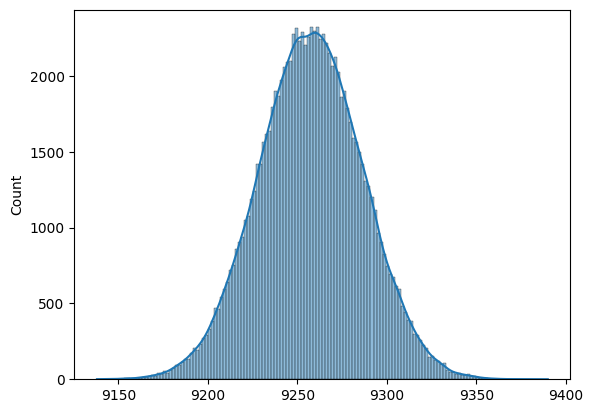

In [ ]:
sns.histplot(sample_means_u_30000,kde=True)
plt.show()

In [ ]:
confidence_level = 0.95

confidence_interval_u_30000 = norm.interval(confidence_level, loc=np.mean(sample_means_u_3000), scale=sample_std_u/np.sqrt(30000))
confidence_interval_u_30000

(9200.948058384865, 9314.226117551802)

Observations and Insights:

1. Confidence interval for our whole sample of unmarried transactions is (9231, 9272) which means 95% of unmarried people spend between average Rs.9231 and Rs.9272 on a black friday sale.
2. Using boostrapping method with different sample sizes, we found that as the bootstrapped sample size is greater, the confidence interval is narrower and closer to the whole data's confidence interval.

- n = 300, Confidence interval = (8693, 9825)
- n = 3000, Confidence interval = (9078, 9436)
- n = 30000, Confidence interval = (9201, 9313)


This is because The width of a confidence interval (CI) is inversely related to the square root of the sample size. As the sample size increases, the standard error decreases, which in turn narrows the width of the confidence interval.

3. There is very less overlaps between the confidence interval, this illustrates how increasing sample size narrows the confidence interval, making overlap with smaller sample sizes less likely.

4. As sample size increases, the sampling distribution of the mean becomes approximately normal, with less spread (i.e., a smaller standard error).

In [ ]:
#How are the spending habits of married people per transaction compared to unmarried people?
#To answer this question, we will perform hypothesis testing
#Ho = There is no difference in their spending habits
#Ha = There is a differnece in their spending habits

In [ ]:
from scipy.stats import ttest_ind

stat, pval = ttest_ind(unmarried['Purchase'],unmarried['Purchase'],alternative='two-sided')

stat, pval

(0.0, 1.0)

In [ ]:
if pval<0.05:
  print('We reject null hypothesis')

else:
  print('We fail to reject null hypothesis')

We fail to reject null hypothesis


In [ ]:
#We can conclude that there is no difference between married and unmarried people's spending habits

Recommendations

For Black Friday, Walmart can offer deals that appeal equally to both married and unmarried customers. This could mean focusing on popular categories like electronics, fashion, and household essentials, which likely appeal to a broad audience without being influenced by marital status.

# **Age analysis**

In [ ]:
#since there are more than 1 group to test against, we will do anova testing to see if there is an impact of age groups on purchasing
walmart_data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
#How are the spending habits of different age groups similar or different?
#To answer this question, we will perform hypothesis testing
#Ho = There is no difference in their spending habits
#Ha = There is a difference in their spending habits

In [ ]:
g1 = walmart_data.loc[(walmart_data['Age']=='0-17')].copy()
g2 = walmart_data.loc[(walmart_data['Age']=='18-25')].copy()
g3 =  walmart_data.loc[(walmart_data['Age']== '26-35')].copy()
g4 = walmart_data.loc[(walmart_data['Age']== '36-45')].copy()
g5 =  walmart_data.loc[(walmart_data['Age']== '46-50')].copy()
g6 =  walmart_data.loc[(walmart_data['Age']== '51-55')].copy()
g7 = walmart_data.loc[(walmart_data['Age']== '55+')].copy()

In [ ]:
dataframes = [g1, g2, g3, g4, g5, g6, g7]

for i, x in enumerate(dataframes):
    print('Comparison of g{} and other age groups'.format(i+1))
    print(' ')
    for j, y in enumerate(dataframes):
        # Skip if comparing the same age groups
        age = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
        if i != j:
            stat, pval = ttest_ind(x['Purchase'],y['Purchase'],alternative='two-sided')
            num = format(pval, '.20f')
            if pval<0.05:
              print('We reject the null hypothesis, and conclude there is a difference in means of sales for age {} and {}'.format(age[i],age[j]))
            else:
              print('We accept the null hypothesis, and conclude there is a no difference in means ofsales for age {} and {}'.format(age[i],age[j]))
        else:
          continue
    print(' ')

Comparison of g1 and other age groups
 
We reject the null hypothesis, and conclude there is a difference in means of sales for age 0-17 and 18-25
We reject the null hypothesis, and conclude there is a difference in means of sales for age 0-17 and 26-35
We reject the null hypothesis, and conclude there is a difference in means of sales for age 0-17 and 36-45
We reject the null hypothesis, and conclude there is a difference in means of sales for age 0-17 and 46-50
We reject the null hypothesis, and conclude there is a difference in means of sales for age 0-17 and 51-55
We reject the null hypothesis, and conclude there is a difference in means of sales for age 0-17 and 55+
 
Comparison of g2 and other age groups
 
We reject the null hypothesis, and conclude there is a difference in means of sales for age 18-25 and 0-17
We reject the null hypothesis, and conclude there is a difference in means of sales for age 18-25 and 26-35
We reject the null hypothesis, and conclude there is a differen

**Summary of Observations:**

G1 (Age 0-17): Sales significantly differ compared to all other age groups (18-25, 26-35, 36-45, 46-50, 51-55, and 55+). This suggests that this age group has distinctive purchasing behavior or preferences compared to older age groups.

G2 (Age 18-25): Sales significantly differ from all other age groups except for 46-50. This indicates that young adults (18-25) tend to have purchasing patterns that are distinct from most other age groups, but are more similar to those in the 46-50 range.

G3 (Age 26-35): Sales significantly differ from most groups except for 46-50. This suggests that individuals in the 26-35 range have similar purchasing behavior to those in the 46-50 range, but different behavior compared to both younger and older demographics.

G4 (Age 36-45): Sales significantly differ from most age groups except for 55+. This suggests that the purchasing behavior of those aged 36-45 is quite different from younger groups, with little difference between those in the 36-45 and 55+ age groups.

G5 (Age 46-50): Sales differ from many age groups, notably showing no significant difference with 18-25 and 26-35. This could imply that the 46-50 age group behaves similarly to younger adults in terms of purchasing, but still diverges in comparison to other age groups.

G6 (Age 51-55): Sales significantly differ from all other age groups. This indicates that individuals in this age range have unique purchasing behaviors distinct from all other age brackets.

G7 (Age 55+): Sales significantly differ from most age groups except for 36-45. This implies that those 55+ years old share similarities in purchasing behavior with individuals in the 36-45 age range, but differ from younger age groups.

# **Recommendations**

Targeting Age-Specific Marketing Campaigns: Given the significant differences in purchasing behavior across age groups, Walmart could develop tailored marketing strategies for different age demographics. For example:

- For the 0-17 age group, Walmart could focus on youth-oriented products, leveraging digital channels and social media platforms where this group is most active.
- For the 18-25 age group, highlight products that appeal to young adults, such as tech gadgets, fashion, and health/wellness items.
- The 26-35 age group could be targeted with products related to family, home improvement, and lifestyle, given their proximity to family-building years.
- For the 36-45 age group, focus on convenience and value-oriented products, such as groceries, household goods, and children's items.
- The 46-50 age group may respond well to promotions on health-related and tech products that support a balanced lifestyle.

Cross-Generational Offers: For age groups with similar purchasing behaviors (e.g., 36-45 and 55+), Walmart could create bundles or cross-generational offers that appeal to both groups, focusing on quality and reliability in products.

Optimizing Product Mix: Walmart could consider adjusting its inventory to reflect the preferences of each age group. For instance:

Younger groups (0-17, 18-25) may prefer more trendy, digital, and budget-friendly items. Older groups (46+, 51-55, 55+) may lean toward more practical, long-lasting goods, especially in categories like health and home goods.



Adjusting Online & Mobile Platforms: Recognize that younger generations might prefer e-commerce, while older customers may favor in-store or mixed shopping experiences. Walmart should continue to optimize both online and offline shopping channels based on these insights.

Finish


---



In [ ]:
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')
print('bsc')